In [30]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from datetime import date

import os
from statsmodels.tsa.holtwinters import ExponentialSmoothing
pickle_path = os.path.join('..', '..', 'data', 'features_by_date')
features_by_date = pd.read_pickle(pickle_path)
features_by_date

,date,num_people_10_00,label_num_people_12_33,label_num_people_11_30,label_num_menus_sold,label_difference_12_normalized,label_difference_10_and_sold_normalized,zurich_vacation,exp_moving_avg_0.1,log_exp_moving_avg_0.1,...,Rain_half_discrete,Rain_binary,average_of_past_weeks,deviation_1_day_ago,deviation_2_day_ago,deviation_3_day_ago,deviation_4_day_ago,deviation_5_day_ago,filled_num_people_11_30,log_num_people_11_30
2022-03-01,2022-03-01,144,152,159,NaN,-0.055556,NaN,0,NaN,NaN,...,-2.656780,0,NaN,-0.020510,-0.053473,-0.128989,0.042452,-0.008307,159.0,5.068904
2022-03-02,2022-03-02,153,154,160,NaN,-0.006536,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,-0.020510,-0.053473,-0.128989,0.042452,160.0,5.075174
2022-03-03,2022-03-03,122,119,132,NaN,0.024590,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,NaN,-0.020510,-0.053473,-0.128989,132.0,4.882802
2022-03-04,2022-03-04,86,62,87,NaN,0.279070,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,NaN,NaN,-0.020510,-0.053473,87.0,4.465908
2022-03-07,2022-03-07,128,136,132,NaN,-0.062500,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,NaN,NaN,NaN,-0.020510,132.0,4.882802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,2022-12-01,218,195,216,NaN,0.105505,NaN,0,203.150887,5.313949,...,-2.656780,0,221.666667,0.273388,-0.132174,-0.019428,0.973511,0.065058,216.0,5.375278
2022-12-02,2022-12-02,119,118,130,NaN,0.008403,NaN,0,108.291627,4.684828,...,-2.656780,0,135.333333,-0.008307,0.273388,-0.132174,-0.019428,0.973511,130.0,4.867534
2022-12-05,2022-12-05,163,150,169,NaN,0.079755,NaN,0,180.256250,5.194379,...,-2.656780,0,196.000000,0.042452,-0.008307,0.273388,-0.132174,-0.019428,169.0,5.129899
2022-12-06,2022-12-06,202,184,206,NaN,0.089109,NaN,0,207.328034,5.334302,...,-2.656780,0,221.333333,-0.128989,0.042452,-0.008307,0.273388,-0.132174,206.0,5.327876


In [3]:
df=features_by_date['filled_num_people_11_30']

C:\Users\mefl\AppData\Local\pypoetry\Cache\virtualenvs\food-saving-showcase-ocOVEVjy-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\mefl\AppData\Local\pypoetry\Cache\virtualenvs\food-saving-showcase-ocOVEVjy-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


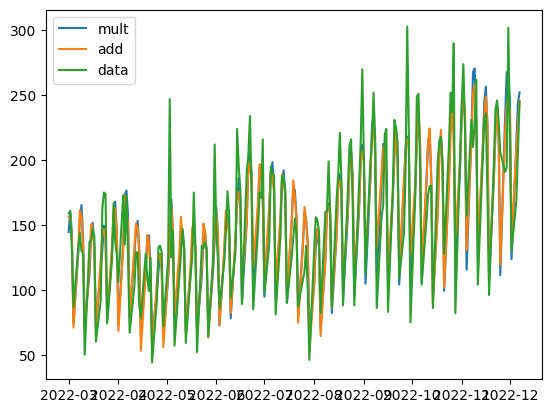

In [14]:
exp_smoothing_seas_add=ExponentialSmoothing(features_by_date['filled_num_people_11_30'], trend='add', seasonal_periods=5,seasonal='add').fit().fittedvalues
exp_smoothing_seas_mult=ExponentialSmoothing(features_by_date['filled_num_people_11_30'], trend='add', seasonal_periods=5,seasonal='mul').fit().fittedvalues

plt.plot(exp_smoothing_seas_mult)
plt.plot(exp_smoothing_seas_add)
plt.plot(features_by_date['filled_num_people_11_30'])
plt.legend(['mult','add','data'])

In [20]:
add_exp_smooth_model=ExponentialSmoothing(features_by_date['filled_num_people_11_30'], trend='add', seasonal_periods=5,seasonal='add').fit()
add_exp_smooth_model.predict(start=len(features_by_date), end=len(features_by_date))

C:\Users\mefl\AppData\Local\pypoetry\Cache\virtualenvs\food-saving-showcase-ocOVEVjy-py3.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


2022-12-08    217.587785
Freq: B, dtype: float64

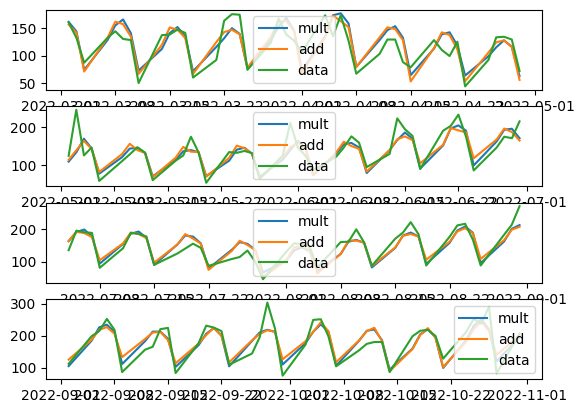

In [15]:
months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(exp_smoothing_seas_mult[two_month])
    plt.plot(exp_smoothing_seas_add[two_month])
    plt.plot(features_by_date.loc[two_month,'filled_num_people_11_30'])
    plt.legend(['mult','add','data'])
    #plt.ylim(3.8,5.8)

In [8]:
fdf['filled_num_people_11_30']

KeyError: 'filled_num_people_11_30'

# Plot log num people 11:30

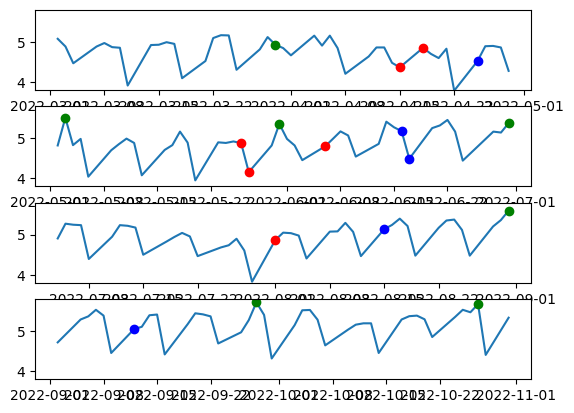

In [204]:
months=[3,5,7,9]
for i, month in enumerate(months):
    subplotnum=len(months)*100 + 10 + i +1
    plt.subplot(subplotnum)
    two_month=(date(year=2022,month=month,day=1)<features_by_date['date'])& (features_by_date['date']<date(year=2022,month=month+2,day=1))

    plt.plot(features_by_date[two_month]['log_num_people_11_30'])
    plt.plot(features_by_date[two_month & (features_by_date['zuehlke_day']==1)]['log_num_people_11_30'],'go')
    plt.plot(features_by_date[two_month & (features_by_date['maybe_holydays']==1)]['log_num_people_11_30'],'bo')
    plt.plot(features_by_date[two_month & (features_by_date['holydays']==1)]['log_num_people_11_30'],'ro')
    #plt.legend(['log','Z','SH','H'])
    plt.ylim(3.8,5.8)

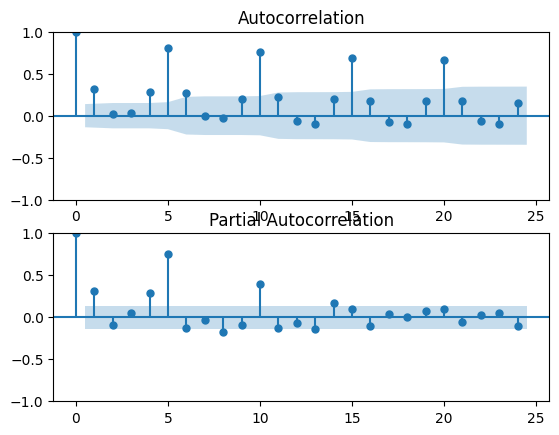

In [205]:
fig,axs=plt.subplots(2,1)
fig=plot_acf(features_by_date['log_num_people_11_30'],ax=axs[0])
fig=plot_pacf(features_by_date['log_num_people_11_30'],ax=axs[1],method='ywm')

In [26]:
features_by_date.loc[date(year=2022,month=9,day=27)]

date                                       2022-09-27
num_people_10_00                                  197
label_num_people_12_33                            174
label_num_people_11_30                            195
label_num_menus_sold                            139.0
label_difference_12_normalized               0.116751
label_difference_10_and_sold_normalized      0.294416
zurich_vacation                                     0
exp_moving_avg_0.1                         181.891244
log_exp_moving_avg_0.1                       5.203409
exp_moving_avg_0.2                         193.532744
log_exp_moving_avg_0.2                       5.265447
exp_moving_avg_0.3                         200.531996
log_exp_moving_avg_0.3                       5.300974
exp_moving_avg_0.4                         205.259641
log_exp_moving_avg_0.4                       5.324276
exp_moving_avg_0.5                          208.77088
log_exp_moving_avg_0.5                       5.341237
exp_moving_avg_0.6          

In [28]:
features_by_date

,date,num_people_10_00,label_num_people_12_33,label_num_people_11_30,label_num_menus_sold,label_difference_12_normalized,label_difference_10_and_sold_normalized,zurich_vacation,exp_moving_avg_0.1,log_exp_moving_avg_0.1,...,Rain_half_discrete,Rain_binary,average_of_past_weeks,deviation_1_day_ago,deviation_2_day_ago,deviation_3_day_ago,deviation_4_day_ago,deviation_5_day_ago,filled_num_people_11_30,log_num_people_11_30
2022-03-01,2022-03-01,144,152,159,NaN,-0.055556,NaN,0,NaN,NaN,...,-2.656780,0,NaN,-0.020510,-0.053473,-0.128989,0.042452,-0.008307,159.0,5.068904
2022-03-02,2022-03-02,153,154,160,NaN,-0.006536,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,-0.020510,-0.053473,-0.128989,0.042452,160.0,5.075174
2022-03-03,2022-03-03,122,119,132,NaN,0.024590,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,NaN,-0.020510,-0.053473,-0.128989,132.0,4.882802
2022-03-04,2022-03-04,86,62,87,NaN,0.279070,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,NaN,NaN,-0.020510,-0.053473,87.0,4.465908
2022-03-07,2022-03-07,128,136,132,NaN,-0.062500,NaN,0,NaN,NaN,...,-2.656780,0,NaN,NaN,NaN,NaN,NaN,-0.020510,132.0,4.882802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,2022-12-01,218,195,216,NaN,0.105505,NaN,0,203.150887,5.313949,...,-2.656780,0,221.666667,0.273388,-0.132174,-0.019428,0.973511,0.065058,216.0,5.375278
2022-12-02,2022-12-02,119,118,130,NaN,0.008403,NaN,0,108.291627,4.684828,...,-2.656780,0,135.333333,-0.008307,0.273388,-0.132174,-0.019428,0.973511,130.0,4.867534
2022-12-05,2022-12-05,163,150,169,NaN,0.079755,NaN,0,180.256250,5.194379,...,-2.656780,0,196.000000,0.042452,-0.008307,0.273388,-0.132174,-0.019428,169.0,5.129899
2022-12-06,2022-12-06,202,184,206,NaN,0.089109,NaN,0,207.328034,5.334302,...,-2.656780,0,221.333333,-0.128989,0.042452,-0.008307,0.273388,-0.132174,206.0,5.327876
